# Loading

In [1]:
import pandas as pd
import numpy as np
import json
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('df_details.csv')

In [3]:
df.shape

(15212, 8)

In [4]:
df.head()

,Unnamed: 0,Unnamed: 0.1,username,data,global rank,india rank,rating,country
0,0,0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96,India
1,1,1,dganguli1997,"{'username': 'dganguli1997', 'githubUrl': 'htt...",5019,501,2053.90,India
2,2,2,rajat_2548,"{'username': 'rajat_2548', 'githubUrl': None, ...",13295,1501,1856.61,India
3,3,3,Anish0909,"{'username': 'Anish0909', 'githubUrl': None, '...",9200,1001,1930.58,India
4,4,4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79,India


In [5]:
df = df[['username', 'data', 'global rank', 'india rank', 'rating', 'country']]

In [6]:
df.columns = ['username', 'data', 'global', 'india', 'rating', 'country']

In [7]:
df.country.value_counts()

India    15212
Name: country, dtype: int64

In [8]:
df.drop('country', axis = 1, inplace = True)

In [9]:
df.head()

,username,data,global,india,rating
0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96
1,dganguli1997,"{'username': 'dganguli1997', 'githubUrl': 'htt...",5019,501,2053.90
2,rajat_2548,"{'username': 'rajat_2548', 'githubUrl': None, ...",13295,1501,1856.61
3,Anish0909,"{'username': 'Anish0909', 'githubUrl': None, '...",9200,1001,1930.58
4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79


In [10]:
df.sort_values('india', inplace = True)

In [11]:
df.head()

,username,data,global,india,rating
0,aryanc403,"{'username': 'aryanc403', 'githubUrl': None, '...",120,1,2841.96
4,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79
5,LosingNowLosingLate,"{'username': 'LosingNowLosingLate', 'githubUrl...",230,3,2701.02
9,taran_1407,"{'username': 'taran_1407', 'githubUrl': None, ...",264,4,2676.75
13,anil9717,"{'username': 'anil9717', 'githubUrl': None, 't...",275,5,2667.42


# Processing

Check the type and format of the loaded data

In [12]:
df.data[10]

"{'username': 'AVIRAL_T', 'githubUrl': None, 'twitterUrl': None, 'linkedinUrl': 'https://linkedin.com/in/aviral-tiwari-b69207196', 'profile': {'reputation': 8, 'aboutMe': '', 'websites': ['https://codeforces.com/profile/Continuous'], 'ranking': 78467, 'userAvatar': 'https://s3-us-west-1.amazonaws.com/s3-lc-upload/assets/default_avatar.jpg', 'realName': 'Aviral Tiwari', 'countryName': 'India'}, 'languageStats': [{'languageName': 'C++', 'problemsSolved': 449}], 'skillStats': {'advanced': [{'tagName': 'Data Stream', 'tagSlug': 'data-stream', 'problemsSolved': 2}, {'tagName': 'Game Theory', 'tagSlug': 'game-theory', 'problemsSolved': 2}, {'tagName': 'Rolling Hash', 'tagSlug': 'rolling-hash', 'problemsSolved': 1}, {'tagName': 'Backtracking', 'tagSlug': 'backtracking', 'problemsSolved': 13}, {'tagName': 'Bitmask', 'tagSlug': 'bitmask', 'problemsSolved': 3}, {'tagName': 'Quickselect', 'tagSlug': 'quickselect', 'problemsSolved': 3}, {'tagName': 'Dynamic Programming', 'tagSlug': 'dynamic-progra

In [13]:
def get_problem_set(data):
    '''
    Function to generate problem_set dictionary of type and number of questions solved
    '''
    try:
        data = data.replace('\'', '\"')
        data = data.replace('None', 'null')
        data = json.loads(data)

        problem_set = dict()

        for label in ['advanced', 'intermediate', 'fundamental']:
            if label in data['skillStats'].keys():
                for problem in data['skillStats'][label]:
                    problem_set[problem['tagSlug']] = problem['problemsSolved']

        return problem_set if len(problem_set.keys()) > 0 else np.NaN
    except:
        return np.NaN

In [14]:
df['problems'] = df.data.apply(get_problem_set)

In [15]:
df.problems.isnull().sum()

355

In [16]:
df.dropna(subset = ['problems'], inplace = True)

In [17]:
df.shape

(14857, 6)

In [18]:
df.reset_index(inplace = True)

In [19]:
df.drop(['index'], axis = 1, inplace = True)

In [20]:
df.problems[0]

{'data-stream': 2,
 'game-theory': 4,
 'rolling-hash': 2,
 'backtracking': 21,
 'bitmask': 12,
 'quickselect': 3,
 'dynamic-programming': 91,
 'divide-and-conquer': 12,
 'trie': 3,
 'union-find': 14,
 'binary-indexed-tree': 5,
 'segment-tree': 3,
 'monotonic-stack': 17,
 'monotonic-queue': 1,
 'topological-sort': 5,
 'shortest-path': 2,
 'tree': 43,
 'binary-tree': 36,
 'hash-table': 87,
 'ordered-set': 8,
 'graph': 14,
 'greedy': 89,
 'binary-search': 63,
 'depth-first-search': 48,
 'breadth-first-search': 41,
 'recursion': 12,
 'sliding-window': 11,
 'bit-manipulation': 33,
 'math': 95,
 'randomized': 2,
 'design': 13,
 'iterator': 1,
 'brainteaser': 2,
 'array': 339,
 'matrix': 53,
 'string': 98,
 'simulation': 27,
 'enumeration': 6,
 'sorting': 79,
 'stack': 43,
 'queue': 3,
 'linked-list': 28,
 'two-pointers': 55}

In [21]:
problem_set = set()
for item in df.problems.iteritems():
    problem_set.update(item[1].keys())
print(len(problem_set))

46


In [22]:
problem_set

{'array',
 'backtracking',
 'binary-indexed-tree',
 'binary-search',
 'binary-tree',
 'bit-manipulation',
 'bitmask',
 'brainteaser',
 'breadth-first-search',
 'data-stream',
 'database',
 'depth-first-search',
 'design',
 'divide-and-conquer',
 'dynamic-programming',
 'enumeration',
 'game-theory',
 'graph',
 'greedy',
 'hash-table',
 'iterator',
 'line-sweep',
 'linked-list',
 'math',
 'matrix',
 'monotonic-queue',
 'monotonic-stack',
 'ordered-set',
 'queue',
 'quickselect',
 'randomized',
 'recursion',
 'rolling-hash',
 'segment-tree',
 'shortest-path',
 'simulation',
 'sliding-window',
 'sorting',
 'stack',
 'string',
 'suffix-array',
 'topological-sort',
 'tree',
 'trie',
 'two-pointers',
 'union-find'}

In [23]:
def get_problem_status(row, problem_set):
    values = list()
    for problem in problem_set:
        if problem in row[5].keys():
            values.append(row[5][problem])
        else:
            values.append(0)
    return values

df[list(problem_set)] = df.apply(lambda row: get_problem_status(row, problem_set), axis = 1, result_type = 'expand')

In [24]:
df.head()

,username,data,global,india,rating,problems,brainteaser,ordered-set,bit-manipulation,randomized,...,hash-table,stack,line-sweep,array,recursion,two-pointers,queue,breadth-first-search,greedy,enumeration
0,ap1008,"{'username': 'ap1008', 'githubUrl': None, 'twi...",222,2,2707.79,"{'data-stream': 2, 'game-theory': 4, 'rolling-...",2,8,33,2,...,87,43,0,339,12,55,3,41,89,6
1,LosingNowLosingLate,"{'username': 'LosingNowLosingLate', 'githubUrl...",230,3,2701.02,"{'data-stream': 2, 'game-theory': 6, 'rolling-...",2,10,47,6,...,116,37,0,298,16,62,6,50,57,2
2,taran_1407,"{'username': 'taran_1407', 'githubUrl': None, ...",264,4,2676.75,"{'data-stream': 8, 'game-theory': 8, 'rolling-...",2,21,47,7,...,171,56,2,479,17,92,14,74,101,12
3,anil9717,"{'username': 'anil9717', 'githubUrl': None, 't...",275,5,2667.42,"{'data-stream': 3, 'game-theory': 2, 'rolling-...",2,10,29,0,...,95,15,0,236,8,23,8,23,51,6
4,razimantv,"{'username': 'razimantv', 'githubUrl': 'https:...",320,6,2639.48,"{'data-stream': 8, 'game-theory': 5, 'rolling-...",3,26,70,8,...,220,62,3,584,24,98,21,99,121,16


In [25]:
df.shape

(14857, 52)

# Scaling

In [26]:
x = pd.concat([df.iloc[:, 4], df.iloc[:, 6:]], axis = 1)

In [27]:
scaler = MinMaxScaler()

In [28]:
scaler.fit(x)

MinMaxScaler()

In [29]:
x = pd.DataFrame(scaler.transform(x), columns = x.columns)

In [30]:
x.head()

,rating,brainteaser,ordered-set,bit-manipulation,randomized,quickselect,iterator,string,depth-first-search,matrix,...,hash-table,stack,line-sweep,array,recursion,two-pointers,queue,breadth-first-search,greedy,enumeration
0,1.000000,0.181818,0.16,0.217105,0.166667,0.428571,0.111111,0.164983,0.182510,0.289617,...,0.194196,0.318519,0.00,0.264431,0.272727,0.335366,0.078947,0.197115,0.317857,0.133333
1,0.994501,0.181818,0.20,0.309211,0.500000,0.571429,0.333333,0.220539,0.243346,0.202186,...,0.258929,0.274074,0.00,0.232449,0.363636,0.378049,0.157895,0.240385,0.203571,0.044444
2,0.974790,0.181818,0.42,0.309211,0.583333,0.285714,0.444444,0.388889,0.391635,0.338798,...,0.381696,0.414815,0.50,0.373635,0.386364,0.560976,0.368421,0.355769,0.360714,0.266667
3,0.967212,0.181818,0.20,0.190789,0.000000,0.000000,0.000000,0.178451,0.098859,0.131148,...,0.212054,0.111111,0.00,0.184087,0.181818,0.140244,0.210526,0.110577,0.182143,0.133333
4,0.944519,0.272727,0.52,0.460526,0.666667,0.571429,0.444444,0.429293,0.460076,0.437158,...,0.491071,0.459259,0.75,0.455538,0.545455,0.597561,0.552632,0.475962,0.432143,0.355556


# Training

Less inertia is needed, so try elbow method

In [31]:
# inertia = list()
# for i in range(1, 20):
#     model = KMeans(n_clusters = i, init = 'k-means++', max_iter = 400, n_init = 10, random_state = 0)
#     model.fit(x)
#     inertia.append(model.inertia_)

In [32]:
# plt.plot([i for i in range(len(inertia))], inertia)
# plt.title('Elbow method for kmeans')
# plt.xlabel('Number of clusters')
# plt.ylabel('Inertia')
# plt.show()

k can be chosen either 3 or 4

# Testing

In [33]:
model = KMeans(n_clusters = 3)
x['label'] = model.fit_predict(x)

In [34]:
x.head()

,rating,brainteaser,ordered-set,bit-manipulation,randomized,quickselect,iterator,string,depth-first-search,matrix,...,stack,line-sweep,array,recursion,two-pointers,queue,breadth-first-search,greedy,enumeration,label
0,1.000000,0.181818,0.16,0.217105,0.166667,0.428571,0.111111,0.164983,0.182510,0.289617,...,0.318519,0.00,0.264431,0.272727,0.335366,0.078947,0.197115,0.317857,0.133333,2
1,0.994501,0.181818,0.20,0.309211,0.500000,0.571429,0.333333,0.220539,0.243346,0.202186,...,0.274074,0.00,0.232449,0.363636,0.378049,0.157895,0.240385,0.203571,0.044444,2
2,0.974790,0.181818,0.42,0.309211,0.583333,0.285714,0.444444,0.388889,0.391635,0.338798,...,0.414815,0.50,0.373635,0.386364,0.560976,0.368421,0.355769,0.360714,0.266667,1
3,0.967212,0.181818,0.20,0.190789,0.000000,0.000000,0.000000,0.178451,0.098859,0.131148,...,0.111111,0.00,0.184087,0.181818,0.140244,0.210526,0.110577,0.182143,0.133333,0
4,0.944519,0.272727,0.52,0.460526,0.666667,0.571429,0.444444,0.429293,0.460076,0.437158,...,0.459259,0.75,0.455538,0.545455,0.597561,0.552632,0.475962,0.432143,0.355556,1


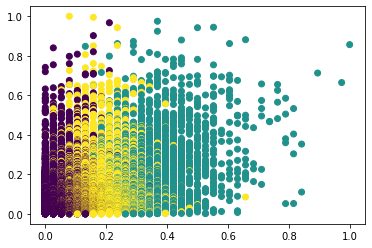

In [52]:
df1 = x[x.label == 0]
df2 = x[x.label == 1]
df3 = x[x.label == 2]

plt.scatter(x['queue'], x.rating, c = x.label, label = x.label)